# Pregunta 2

#### Suponga que se tiene el sistema como en el problema anterior, pero ahora la partícula tiene carga q > 0 y en el origen también se encuentra una partícula de carga q > 0.

#### (a) Sin considerar la fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos con alguna simulación).

Tenemos que la energia potencial de las cargas va como:

$$
U_1=\frac{1}{4\pi\epsilon_0} \frac{q^2}{r}
$$

Mientras que el potencial de un resorte es: 

$$
U_2=(kr^2)/2
$$

Entonces la energía potencial del sistema de cargas oscilando es la suma de $U_1$ y $U_2$.

In [2]:
from pylab import*
%matplotlib inline

In [1]:
#Considerando que (4*pi*epsilon)=1=k, tenemos que:

def energia_potencial(r):
    u_1 = (1./r)
    u_2 = 0.5*(r**2)
    return u_1+u_2

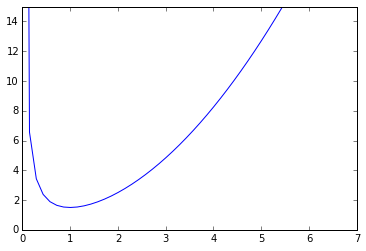

In [3]:
r = linspace(0.01,7)
plot(r,energia_potencial(r))
ylim([0,15])
show()

 La gráfica de la energía potencial total contra la distancia entre las cargas $r$ tiene un mínimo en $r_0 = 1$ pues:

$$
\frac{d}{dr} \Bigl ( \frac{1}{r} + \frac{r^2}{2} \Bigr ) = r - \frac{1}{r^2}
$$

$$
r - \frac{1}{r^2} = 0 \ \ \ \  \Leftrightarrow \ \ \ \ r^3 - 1 = 0 \ \ \ \  \Leftrightarrow \ \ \ \ r = 1
$$

Lo cual implica que van a existir órbitas estables cuando las cargas estén a distancia $r_0$.

Para hacer la simulación que muestre la existencia de dichas órbitas, vamos a escribir las ecuaciones de movimiento:

Dado que no existe fricción, el movimiento de una de las partículas cargadas (suponiendo que la otra está fija en el origen) está dado por:

$$
m\ddot{\vec{r}}+\frac{1}{4\pi\epsilon_0}\frac{q_1q_2}{\vert \vec{r}^2 \vert}\dot{\vec{r}} +k\vec{r} = 0  \ \ \ \ \ \ \dots (1)
$$

Donde $k$ es la constante del oscilador, $\epsilon_0$ es la permitividad eléctrica y  $\vec{r}$ es la distancia entre las cargas.

Separándola en coordenadas obtenemos:

$$
m\ddot{x}+\frac{1}{4\pi\epsilon_0}\frac{q_1q_2}{r^2} \dot{x} + k x = 0 \ \ \ \ \ \ \ \ \ \ \dots (2)
\\
m\ddot{y}+\frac{1}{4\pi\epsilon_0}\frac{q_1q_2}{r^2} \dot{y} + k y = 0 \ \ \ \ \ \ \ \ \ \ \dots (3)
$$


In [44]:
#x[0]=posición_x, x[1]=posición_y, x[2]=velocidad_x, x[3]=velocidad_y
#z[0]=gamma, z[1]=mu, z[2]=k, z[3]=m, z[4]=4*pi*epsilon, z[5]=q_1, z[6]=q_2

def ec_mov(x,t,z,fr='no'):

    mod = (x[0]**2+x[1]**2)
    if fr == 'no':
        dot_x=x[2]
        ddot_x=-((z[5]*z[6]*x[2])/(z[3]*mod*z[4]))-(z[2]/z[3])*x[0]
    
        dot_y=x[3]
        ddot_y=-((z[5]*z[6]*x[3])/(z[3]*mod*z[4]))-(z[2]/z[3])*x[1]        
        
    else:
        dot_x=x[2]
        fr_x=fric(([x[2],x[3]]),z[0],z[1])[0]
        ddot_x=fr_x/2-((z[5]*z[6]*x[2])/(z[3]*mod*z[4]))-(z[2]/z[3])*x[0]
    
        dot_y=x[3]
        fr_y=fric(([x[2],x[3]]),z[0],z[1])[1]
        ddot_y=fr_y/2-((z[5]*z[6]*x[3])/(z[3]*mod*z[4]))-(z[2]/z[3])*x[1]
    
    return array([dot_x,dot_y,ddot_x,ddot_y])

Para mostrar las órbitas circulares:

In [45]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [61]:
t,sol=rk4(ec_mov,[0,1,0.1,0],[0,500],[0.1,0.2,0.3,1,1,1,1])

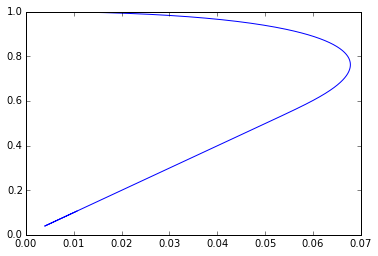

In [62]:
plot(sol[:,0],sol[:,1])
show()

In [ ]:
El momento angular?? F_ef = l^2/(2mr^2) 

### (b) Considerando la fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos con alguna simulación).

Utilizando las mismas fórmulas para la fricción se tiene que:

In [ ]:
#v[0]=vel_x, v[1]=vel_y
def fric(v,gamma,mu):
    norma=(v[0]**2+v[1]**2)**0.5
    if norma < 1:
        fric_x=-gamma*norma*v[0]
        fric_y=-gamma*norma*v[1]
        return array([fric_x,fric_y])
    else:
        fric_x=-mu*(norma**(1.5))*v[0]
        fric_y=-mu*(norma**(1.5))*v[1]
        return array([fric_x,fric_y])